<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/06_logistic_regression/2_logistic_regression_theorie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

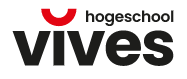<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# LOGISTIC REGRESSION: THEORIE

Deze notebook bevat de theorie over logistische regressie (Engels: logistic regression).

**OPGELET!** Logistic regression wordt toegepast bij classificatie!

## INLEIDING

**Perceptron**:
- voorspelling: 0 of 1
- voorbeeld:
 - "ik ben content" = 1
 - "ik ben dolgelukkig" = 1
- DISCREET


**Logistic regression**:
- voorspelling: tussen 0 en 1
- voorbeeld:
 - "ik ben content" = 0.6
 - "ik ben dolgelukkig" = 0.9
- CONTINU
- voorspelling kan als kans worden geïnterpreteerd:
 - kleiner dan 0.5: ontevreden
 - gelijk aan 0.5: neutraal
 - groter dan 0.5: tevreden


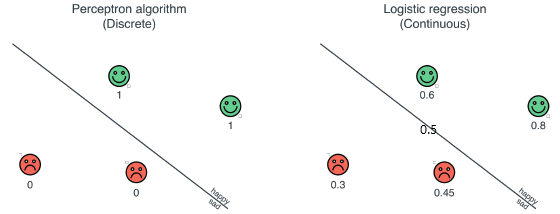

## SIGMOIDEFUNCTIE

#### **Stapfunctie versus Sigmoïdefunctie**

**Perceptron**: (heaviside) stapfunctie

> $H(x) =
  \left\{
    \begin{array}{l}
      1 \text{ if } x \geq 0 \\
      0 \text{ if } x < 0
    \end{array}
  \right.$

**Logistic regression**: sigmoïdefunctie of S-functie

> $\sigma(x)=\dfrac{1}{1+e^{-x}}$


Afgeleide van de sigmoïdefunctie is handiger!

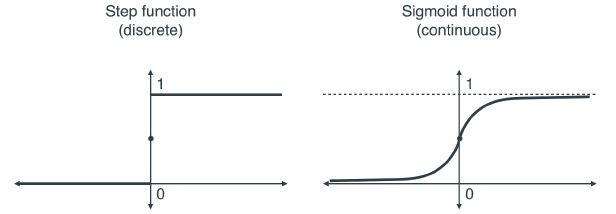

NOOT: stap- en sigmoïdefunctie zijn **activiatiefuncties** (Engels: activation function)

#### **Sigmoïdefunctie plotten**

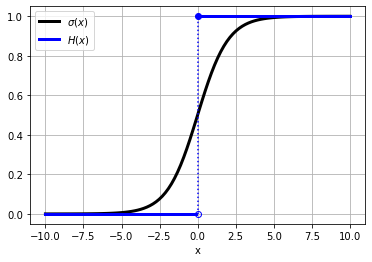

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sigmoid = lambda x: 1 / (1 + np.exp(-x))  # sigmoïdefunctie

x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x), "k-", linewidth=3)
plt.plot(x[x<0], np.zeros(np.sum(x<0)), 'b-', linewidth=3)
plt.plot(x[x>=0], np.ones(np.sum(x>=0)), 'b-', linewidth=3)
plt.plot([0, 0], [0, 1], 'b:')
plt.plot(0, 0, "bo", markerfacecolor="None")
plt.plot(0, 1, "bo")
plt.xlabel("x")
plt.legend(["$\sigma(x)$", "$H(x)$"])
plt.grid()

#### **Sigmoïdefunctiewaarden**

Gelijk aan 0 en 1 wanneer $x$ oneindig klein of groot is!!

- $\sigma(-\infty) = 0$
- $\sigma(0) = 0.5$
- $\sigma(+\infty) = 1$



In [ ]:
import pandas as pd
x = np.array([-np.Inf, -5, -1, 0, 1, 5, np.Inf])
pd.DataFrame(dict(x=x, sigma=sigmoid(x)))

,x,sigma
0,-inf,0.000000
1,-5.0,0.006693
2,-1.0,0.268941
3,0.0,0.500000
4,1.0,0.731059
5,5.0,0.993307
6,inf,1.000000


#### **Voorspellen met de sigmoïdefunctie**

Voorbeeld: Alien planet
- linear classifier: $x_1 + x_2 - 3.5 = 0$
- $x_1$ = #aack = 2
- $x_2$ = #beep = 3

In [ ]:
score   = lambda x1, x2: x1 + x2 - 3.5
step    = lambda score: int(score >= 0)
sigmoid = lambda score: 1 / (1 + np.exp(-score))

print("score:", score(2, 3))
print("perceptron:", step(score(2, 3)))
print("logistic:", sigmoid(score(2, 3)))

score: 1.5
perceptron: 1
logistic: 0.8175744761936437


## ERRORFUNCTIES

#### **Algoritme**

**Logistic regression algoritme**:
- idem als perceptron algoritme
- *error functie is anders*

**Goeie error functies**:
- punt is correct geclassificeerd: kleine error
- punt is foutief geclassificeerd: grote error
- totale error van een verzameling datapunten = som van de individuele errors van die punten

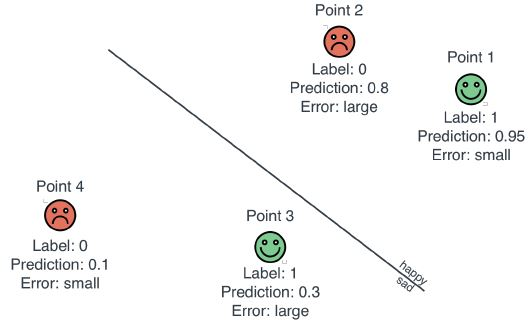

#### **Mogelijke error functies**

Veel mogelijkheden... wij bespreken er 3:
- **absolute loss**: $|y - y_p|$
- **square loss**: $(y- y_p)^2$
- **log loss** of **binary cross-entropy**: $-y\ln(y_p)-(1-y)\ln(1-y_p)$

met $y$ het label, $y_p$ de predictie en $\ln$ de natuurlijke logaritme

- absolute loss en square loss: zie regressie
- log loss: zie verder

In [ ]:
import pandas as pd
import numpy as np

# loss functies om individuele error van datapunten te berekenen
loss = dict(
    abs_loss = lambda y, yp: np.abs(y - yp),
    square_loss = lambda y, yp: (y - yp) ** 2,
    log_loss = lambda y, yp: -y * np.log(yp) - (1 - y) * np.log(1 - yp)
)

# voorbeeldje
vb = pd.DataFrame(dict(y=[1, 0, 1, 0], yp=[0.95, 0.8, 0.3, 0.1]))
for name, func in loss.items():
    vb[name] = func(vb["y"], vb["yp"])
vb

,y,yp,abs_loss,square_loss,log_loss
0,1,0.95,0.05,0.0025,0.051293
1,0,0.80,0.80,0.6400,1.609438
2,1,0.30,0.70,0.4900,1.203973
3,0,0.10,0.10,0.0100,0.105361


#### **Natuurlijke logaritme**

Probleem bij **absolute en square loss**:
- fout is maximaal gelijk aan 1
- **te klein!**

Wat we willen:
- bij 100% correct label: fout gelijk aan 0
- bij 100% fout label: zeer grote fout

**natuurlijke logaritme** $\ln$:
- $\ln(x=1) = 0$
- $\ln(x=0) = -\infty$

**Oplossing:** $-\ln(x)$ nemen!

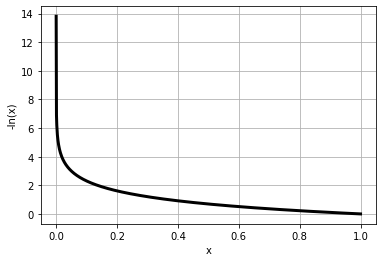

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1e-6, 1, 1000)
plt.plot(x, -np.log(x), 'k-', linewidth=3)  # -ln(x) functie tussen 0 en 1
plt.xlabel('x')
plt.ylabel('-ln(x)')
plt.grid()

In [ ]:
import numpy as np
np.log(1)

0.0

In [ ]:
np.exp(1)

2.718281828459045

In [ ]:
np.log10(100)

2.0

In [ ]:
10**2

100

#### **Log Loss**

Voorbeeld 1:
- label "happy": $y=1$
- voorspelling: $y_p=0.95$
- kans op "happy": $y_p=0.95$
- error: $-\ln(y_p)=-\ln(0.95)=0.051$

Voorbeeld 2:
- label "happy": $y=1$
- voorspelling: $y_p=0.3$
- kans op "happy": $y_p=0.3$
- error: $-\ln(y_p)=-\ln(0.3)=1.20$

Voorbeeld 3:
- label "sad": $y=0$
- voorspelling: $y_p=0.8$
- kans op "sad": $1-y_p=0.2$
- error: $-\ln(1-y_p)=-\ln(0.2)=1.61$

Voorbeeld 4:
- label "sad": $y=0$
- voorspelling: $y_p=0.1$
- kans op "sad": $1-y_p = 0.9$
- error: $-\ln(1-y_p)=-\ln(0.9)=0.11$

**Conclusie**:
- $y=1$: error = $-\ln(y_p) = -y\ln(y_p)$
- $y=0$: error = $-\ln(1-y_p) = -(1-y)\ln(1-y_p)$

**Samenvoegen**:
> error = $-y\ln(y_p) - (1-y)\ln(1-y_p)$

(bij $y=0$ is eerste term 0, bij $y=1$ is tweede term 0)


#### **Totale error**

- Error = -log van kans dat datapunt eigen label is

- Kans op onafhankelijke gebeurtenissen A en B en C en ...:
> $P(A \text{ en } B \text{ en } C \text{ en ...} ) = P(A) . P(B) . P(B) . \text{ ...}$

- som van logaritmes = logaritme van product:
> $\ln(p_1) + \ln(p_2) + \text{...} = \ln(p_1 . p_2 . \text{ ...})$

- loss = totale error:
> $\sum_{i=1}^{m}-y_i\ln(y_{p,i}) - (1-y_i)\ln(1-y_{p,i})$

- **Conclusie**: loss = totale error = -log van kans dat alle datapunten hun eigen label zijn!

- Voordeel: door logaritme te nemen leiden zeer kleine kansen niet tot zeer kleine loss...

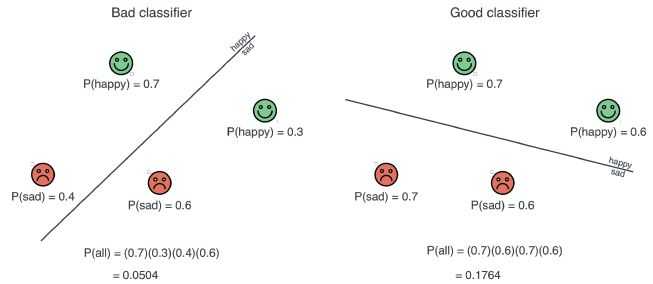

#### **Totale error: voorbeeldje**

punt 1 is "happy":
- label: $y_1=1$
- predictie: $y_{p,1}=0.95$
- kans dat punt 1 "happy" is: $P_1=y_{p,1}=0.95$

punt 2 is "sad":
- label: $y_2=0$
- predictie: $y_{p,2}=0.8$
- kans dat punt 2 "sad" is: $P_2=1-y_{p,2}=0.2$

kans dat punt 1 "happy" is én punt 2 "sad":
> $P_{tot} = P_1 . P_2 = 0.19$

In [ ]:
import numpy as np

y = np.array([1, 0])  # labels y1 en y2
yp = np.array([0.95, 0.8])  # predicties yp1 en yp2
P = (1 - y) - (-1)**y * yp  # individuele kansen P1 en P2

Ptot = np.prod(P)  # totale kans P1 * P2
loss = -np.log(Ptot)  # loss
print(f"kans: {Ptot*100:.1f} % - loss: {loss:.2f}")

kans: 19.0 % - loss: 1.66


Totale error berekenen met loss-functie:

In [ ]:
log_loss = lambda y, yp: -y * np.log(yp) - (1 - y) * np.log(1 - yp) # log loss functie
loss = np.sum(log_loss(y, yp)) # loss = totale error
print(f"kans: {np.exp(-loss)*100:.1f} % - loss: {loss:.2f}")

kans: 19.0 % - loss: 1.66


## LOGISTIC REGRESSION TRICK

#### **Hoe kansen vergroten?**

- **Perceptron trick**:
 - punt correct geclassificeerd: rechte niet bewegen
 - punt foutief geclassificeerd: rechte beetje naar punt toe bewegen

- **Logistic Regression trick**:
 - punt correct geclassificeerd: rechte beetje weg van punt bewegen
 - punt foutief geclassificeerd: rechte beetje naar punt toe bewegen
 - in beide gevallen vergroot de kans op correcte classificatie!


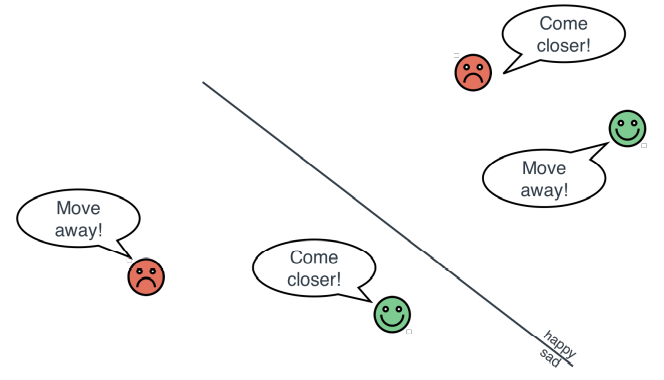

#### **Alien Planet: part I**

- **classifier**: $x_1 + x_2 - 4$
 - gewicht #aack = $w_1$ = 1
 - gewicht #beep = $w_2$ = 1
 - bias = $b$ = -4

- **perceptron**:
 - stapfunctie
 - $y_p = H(x_1 + x_2 - 4)$
 - $y_p \in \{0, 1\}$

- **logistic regression**:
 - sigmoïdefunctie
 - $y_p = \sigma(x_1 + x_2 - 4)$
 - $0 \leq y_p \leq 1$


In [ ]:
import numpy as np

zin = "aack beep beep aack beep beep"
y = 0  # label is "sad" -> foutief geclassificeerd
x = np.array([zin.count("aack"), zin.count("beep")])  # [2, 4]
w = np.array([1, 1])
b = -4
score = np.dot(x, w) + b
print("score:", score)

yp_perceptron = int(score >= 0)
yp_logistic = 1 / (1 + np.exp(-score))
print("perceptron:", yp_perceptron, "logistic:", yp_logistic)

score: 2
perceptron: 1 logistic: 0.8807970779778823


#### **Alien Planet: part II**

Aanpassen van gewichten en bias:

- **perceptron trick**:
 - $w_i \gets w_i + \eta(y-y_p)x_i$
 - $b \gets b + \eta(y-y_p)$

- **logistic regression trick**:
 - $w_i \gets w_i + \eta(y-y_p)x_i$
 - $b \gets b + \eta(y-y_p)$

In beide gevallen hetzelfde!!


In [ ]:
eta = 0.01  # learning rate

print("perceptron:")
w_perceptron = w + eta * (y - yp_perceptron) * x
b_perceptron = b + eta * (y - yp_perceptron)
print("w =", w_perceptron, "b =", b_perceptron)  # nieuwe gewichten en bias
score_perceptron = np.dot(x, w_perceptron) + b_perceptron
print("score:", score, "->", score_perceptron)  # nieuwe score
print("predictie =", int(score_perceptron >= 0))  # nieuwe voorspelling

print("\nlogistic regression:")
w_logistic = w + eta * (y - yp_logistic) * x
b_logistic = b + eta * (y - yp_logistic)
print("w =", w_logistic, "b =", b_logistic)  # nieuwe gewichten en bias
score_logistic = np.dot(x, w_logistic) + b_logistic
print("score:", score, "->", score_logistic)  # nieuwe score
print("predictie =", 1 / (1 + np.exp(-score_logistic)))  # nieuwe voorspelling

perceptron:
w = [0.98 0.96] b = -4.01
score: 2 -> 1.79
predictie = 1

logistic regression:
w = [0.98238406 0.96476812] b = -4.008807970779779
score: 2 -> 1.8150326136246449
predictie = 0.8599690118263691


#### **Alien Planet: part III**

Stel: punt is **correct** geclassificeerd
- **perceptron**: lijn blijft, classifier wordt niet verbeterd
- **logistic regression**: lijn beweegt wel, classifier wordt verbeterd!

In [ ]:
y = 1  # label is "happy" -> correct!

print("perceptron:")
w_perceptron = w + eta * (y - yp_perceptron) * x
b_perceptron = b + eta * (y - yp_perceptron)
print("w =", w_perceptron, "b =", b_perceptron)  # nieuwe gewichten en bias
score_perceptron = np.dot(x, w_perceptron) + b_perceptron
print("score:", score, "->", score_perceptron)  # nieuwe score
print("predictie =", int(score_perceptron >= 0))  # nieuwe voorspelling

print("\nlogistic regression:")
w_logistic = w + eta * (y - yp_logistic) * x
b_logistic = b + eta * (y - yp_logistic)
print("w =", w_logistic, "b =", b_logistic)  # nieuwe gewichten en bias
score_logistic = np.dot(x, w_logistic) + b_logistic
print("score:", score, "->", score_logistic)  # nieuwe score
print("predictie =", 1 / (1 + np.exp(-score_logistic)))  # nieuwe voorspelling

perceptron:
w = [1. 1.] b = -4.0
score: 2 -> 2.0
predictie = 1

logistic regression:
w = [1.00238406 1.00476812] b = -3.998807970779779
score: 2 -> 2.0250326136246444
predictie = 0.8834003902192504


#### **Logistic regression trick: code**

- Zelfde als perceptron trick
- Enkel stapfunctie vervangen door sigmoïde functie

In [ ]:
import numpy as np

def sigmoid(score):
    return 1 / (1 + np.exp(-score))  # score mag ook array zijn

def logistic_regression_trick(w, b, x, y, eta=0.01):
    yp = sigmoid(b + np.dot(x, w))  # sigmoïde functie gebruiken!
    eta2 = (y - yp) * eta
    return  w + eta2 * x, b + eta2

In [ ]:
# test
zin = "aack beep beep aack beep beep"
y = 0  # label is "sad" -> foutief geclassificeerd
x = np.array([zin.count("aack"), zin.count("beep")])  # [2, 4]
w = np.array([1, 1])
b = -4

w_new, b_new = logistic_regression_trick(w, b, x, y)
w_new, b_new

(array([0.98238406, 0.96476812]), -4.008807970779779)

## LOGISTIC REGRESSION ALGORITME

#### **Logistic regression error: code**

- scores: zelfde berekening als bij perceptron
- predicties: sigmoïdefunctie ipv stapfunctie
- erros: log loss ipv perceptron error

In [ ]:
import numpy as np

def logistic_regression_error(w, b, X, y):
    scores = b + np.dot(X, w)  # alle scores
    yp = sigmoid(scores)  # predicties
    errors = -y * np.log(yp) - (1 - y) * np.log(1 - yp)  # errors: log loss
    return np.sum(errors)  # totale error

In [ ]:
# voorbeeld
zin = "aack beep beep aack beep beep"
y = 0  # label is "sad" -> foutief geclassificeerd
X = np.array([[zin.count("aack"), zin.count("beep")]])  # [[2, 4]] (2D array!)
w = np.array([1, 1])
b = -4

logistic_regression_error(w, b, X, y)

2.1269280110429714

#### **Logistic regression algoritme: code**

Idem als perceptron algoritme, tenzij:
- `logistic_regression_trick()` ipv `perceptron_trick()`
- `logistic_regression_error()` ipv `perceptron_error()`

In [ ]:
from random import shuffle

def logistic_regression(X, y, num_of_epochs, eta=0.01):

    m, n = X.shape  # aantal examples en features
    ind = list(range(m))  # list met indices

    # initialisatie
    w = np.random.random(n)  # gewichten initialiseren met kleine random waarde
    b = 0  # bias initialiseren als 0
    errors = np.array([])  # array met totale fout

    # epochs doorlopen
    for _ in range(num_of_epochs):

        # dataset willekeurig doorlopen
        shuffle(ind)  # shuffle indices
        for i in ind:

            # classifier aanpassen volgens "logistic regression trick"
            w, b = logistic_regression_trick(w, b, X[i, :], y[i], eta)

        # totale error berekenen na elke epoch
        error = logistic_regression_error(w, b, X, y)
        errors = np.append(errors, error)

    # ouput
    return w, b, errors

#### **Alien Planet: part I**

- aliens2.csv inlezen
- logistic regression toepassen:
 - aantal epochs = 1000
 - learning rate = 0.1

In [ ]:
import pandas as pd

aliens2 = pd.read_csv("data/aliens2.csv", sep=";")
X = aliens2[["Crack", "Dunk"]].values  # 2 features "Crack" en "Dunk" als array opvragen
y = (aliens2["Mood"]=="happy").values.astype(int)  # labels omzetten naar array met 1 en 0

# logistic regression toepassen
w, b, errors = logistic_regression(X, y, 1000, 0.1)
w, b

(array([2.82471012, 5.0038511 ]), -13.116644961609815)

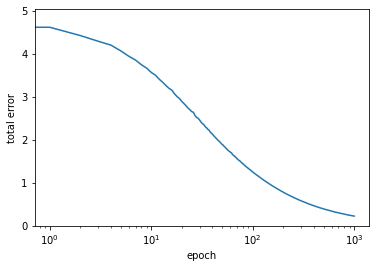

In [ ]:
import matplotlib.pyplot as plt

plt.semilogx(errors);
plt.xlabel("epoch");
plt.ylabel("total error");

#### **Alien Planet: part II**

- voorspellingen: scores transformeren mbv sigmoïdefunctie -> kansen
- kansen -> labels: kansen afronden
- plot maken: zelfde functie als `plot_perceptron()`

In [ ]:
# voorspellingen
def predict(w, b, X):
    return sigmoid(np.dot(X, w) + b)

predict(w, b, X)

array([3.39042988e-05, 4.27398787e-02, 5.02604216e-03, 7.84660469e-02,
       9.91160257e-01, 9.26931174e-01, 9.95345186e-01, 9.99471177e-01])

In [ ]:
# labels
np.round(predict(w, b, X))

array([0., 0., 0., 0., 1., 1., 1., 1.])

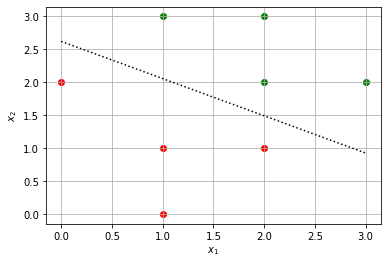

In [ ]:
# plot
def plot_logistic_regression(X, y, w, b):
    plt.scatter(X[y==1, 0], X[y==1, 1], color="green")
    plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
    xline = np.arange(0, 4)
    yline = -xline * w[0] / w[1] - b / w[1]
    plt.plot(xline, yline, 'k:');
    plt.grid()
    plt.xlabel("$x_1$");  # $...$ om LaTeX te gebruiken
    plt.ylabel("$x_2$");

plot_logistic_regression(X, y, w, b)

#### **Gradient Descent**

- net als bij lineaire regressie en perceptron passen we Stochastic Gradient Descent (SGD) toe
- "foutenberg" (mount errorest) stap voor stap afdalen
- elk punt op de berg is een mogelijke classifier (x1, x2, b)
- hoogte van het punt = error = log loss
- wiskundig gezien: "trick" = gradiënt van lossfunctie benaderen obv 1 punt om gewichten aan te passen

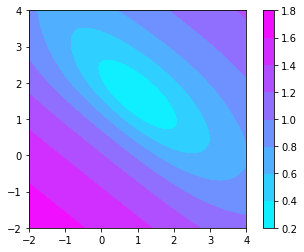

In [ ]:
nw = 100  # aantal intervallen voor w1 en w2
w1 = np.linspace(-2, 4, nw)  # w1 varieert van -2 tot 4
w2 = w1.copy()  # idem voor w2
b = -4  # bias laten we niet variëren
errors = np.zeros((nw, nw))  # error matrix initialiseren

# log loss error berekenen voor elke combinatie van w1 en w2
for i in range(nw):
    for j in range(nw):
        errors[i, j] = logistic_regression_error(np.array([w1[i], w2[j]]), b, X, y)

# contour plot maken van onze error functie
fig, ax = plt.subplots()
w2, w1 = np.meshgrid(w2, w1)  # meshgrid matrices voor w1 en w2
cs = ax.contourf(w1, w2, np.log10(errors),  # log(errors) geeft duidelijker contouren
                 cmap=plt.cm.cool);  # filled contour
ax.set_aspect("equal")  # assen gelijke schaal geven
fig.colorbar(cs);  # colorbar toevoegen

## SCIKIT-LEARN

- `LogisticRegression` klasse in module `linear_model`
- zelfde interface als `Perceptron` klasse:
 - attribuut `coef_`: gewichten
 - attribuut `intercept_`: bias
- verschillende solvers mogelijk, maar geen SGD, dus geen learning rate!
- `penalty="none"`: geen regularisatie (zie topic 4)

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

lr = LR(penalty='none')
lr.fit(X, y)
print("gewichten:", lr.coef_.flatten(), "bias:", lr.intercept_.item())

gewichten: [ 9.87462681 17.69130014] bias: -46.142446261712045


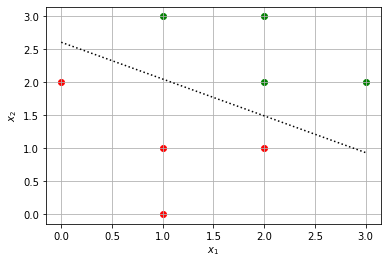

In [ ]:
plot_logistic_regression(X, y, lr.coef_.flatten(), lr.intercept_.item())

## CODE REFACTORING

#### **Superklasse Classifier**

- losse functies onderbrengen in 1 klasse
- veel code gekopieerd van perceptron: overerving toepassen
- beginnen met abstracte superklasse `Classifier`

In [ ]:
from abc import ABC, abstractmethod
import numpy as np
import matplotlib.pyplot as plt

class Classifier(ABC):

    # constructor
    def __init__(self, num_of_epochs, learning_rate):
        self.num_of_epochs = num_of_epochs
        self.learning_rate = learning_rate
        self.w = None  # gewichten
        self.b = None  # bias
        self.error = None  # array met totale error na elke epoch

    # berekent score voor meerdere datapunten
    def score(self, X):
        return self.b + np.dot(X, self.w)

    # berekent voorspelling voor meerdere datapunten
    def predict(self, X):
        return self._activation(self.score(X))

    # past gewichten en bias aan obv 1 punt
    def _trick(self, x, y):
        yp = self.predict(x[np.newaxis, :])  # x vector -> 2D matrix
        eta2 = (y - yp) * self.learning_rate
        self.w += eta2 * x
        self.b += eta2

    # activatiefunctie
    @abstractmethod
    def _activation(self, y, yp):
        pass

    # berekent errors van meerdere datapunten
    @abstractmethod
    def _errors(self, X, y):
        pass

    # traint model
    def fit(self, X, y):
        m, n = X.shape  # aantal examples en features
        ind = list(range(m))  # list met indices
        # initialisatie
        self.w = np.random.random(n)  # gewichten initialiseren met kleine random waarde
        self.b = 0  # bias initialiseren als 0
        self.error = np.array([])  # array met totale fout
        # epochs doorlopen
        for _ in range(self.num_of_epochs):
            # dataset willekeurig doorlopen
            shuffle(ind)  # shuffle indices
            for i in ind:
                # classifier aanpassen volgens "trick"
                self._trick(X[i, :], y[i])
            # totale error berekenen na elke epoch
            self.error = np.append(self.error, np.sum(self._errors(X, y)))

    # plot totale error vs epoch
    def plot_error(self):
        line = plt.semilogx(np.arange(1, len(self.error) + 1), self.error)
        plt.xlabel("epoch")
        plt.ylabel("error")
        plt.grid()
        return line

    # plot 2D classifier (2 features)
    def plot2D(self, X, y):
        if X.shape[1] == 2:
            plt.scatter(X[y==1, 0], X[y==1, 1], color="green")
            plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
            xline = np.arange(0, 4)
            yline = -xline * self.w[0] / self.w[1] - self.b / self.w[1]
            plt.plot(xline, yline, 'k:');
            plt.grid()
            plt.xlabel("$x_1$");  # $...$ om LaTeX te gebruiken
            plt.ylabel("$x_2$");
        else:
            print("plot is only possible if 2D...")

#### **Subklassen Perceptron en LogisticRegression**

- subklassen `Perceptron` en `LogisticRegression`
- abstracte methodes `_loss()` en `_errors()` implementeren

In [ ]:
class Perceptron(Classifier):

    def __init__(self, num_of_epochs=100, learning_rate=0.01):
        Classifier.__init__(self, num_of_epochs, learning_rate)

    def _activation(self, scores):
        return (scores >= 0).astype(int)  # stapfunctie

    def _errors(self, X, y):
        scores = self.score(X)  # scores
        yp = self._activation(scores)  # predicties
        return (yp - y) * scores  # errors


class LogisticRegression(Classifier):

      def __init__(self, num_of_epochs=200, learning_rate=0.1):
          Classifier.__init__(self, num_of_epochs, learning_rate)

      def _activation(self, scores):
          return 1 / (1 + np.exp(-scores))  # sigmoïdefunctie

      def _errors(self, X, y):
          scores = self.score(X)  # alle scores
          yp = self._activation(scores)  # predicties
          return -y * np.log(yp) - (1 - y) * np.log(1 - yp)  # errors: log loss

#### **Test klasse Perceptron**

- "aliens2.csv" inlezen
- klasse `Perceptron` toepassen

In [ ]:
import pandas as pd

aliens2 = pd.read_csv("data/aliens2.csv", sep=";")
X = aliens2[["Crack", "Dunk"]].values  # 2 features "Crack" en "Dunk" als array opvragen
y = (aliens2["Mood"]=="happy").values.astype(int)  # labels omzetten naar array met 1 en 0

In [ ]:
perceptron = Perceptron()
perceptron.fit(X, y)
print(perceptron.predict(X))

[0 0 0 0 1 1 1 1]


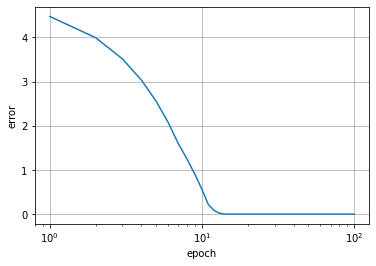

In [ ]:
perceptron.plot_error();

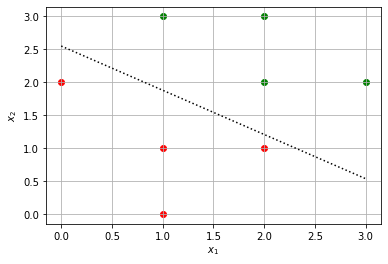

In [ ]:
perceptron.plot2D(X, y);

#### **Test klasse LogisticRegression**

- "aliens2.csv" inlezen
- klasse `LogisticRegression` toepassen

In [ ]:
import pandas as pd

aliens2 = pd.read_csv("data/aliens2.csv", sep=";")
X = aliens2[["Crack", "Dunk"]].values  # 2 features "Crack" en "Dunk" als array opvragen
y = (aliens2["Mood"]=="happy").values.astype(int)  # labels omzetten naar array met 1 en 0

In [ ]:
logistic = LogisticRegression()
logistic.fit(X, y)
print(logistic.predict(X))
print(np.round(logistic.predict(X)))

[0.00326117 0.14663349 0.05087549 0.215038   0.93501032 0.81778666
 0.95822407 0.98658223]
[0. 0. 0. 0. 1. 1. 1. 1.]


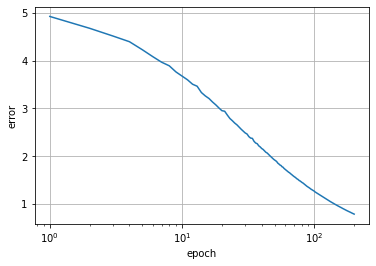

In [ ]:
logistic.plot_error();

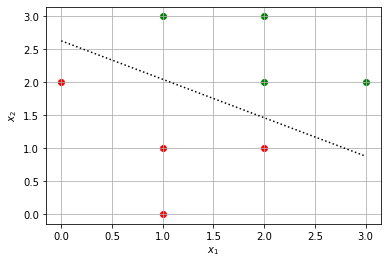

In [ ]:
logistic.plot2D(X, y);

## MULTINOMIAL CLASSIFICATION

- binaire classificatie: 2 klassen
- multinomiale classificatie: **meer dan 2 klassen**
 - $k$ klassen
 - 1 classifier voor elke klasse toepassen
 - datapunt krijgt score $a_i$ voor elke klasse $i$
 - **Softmaxfunctie** toepassen
 - predictie: $y_p = \dfrac{e^{a_i}}{e^{a_1}+e^{a_2}+...+e^{a_k}}$
- **voorbeeld**:
 - klassen: hond, kat, vogel
 - score hond = 2, score kat = 0, score vogel = -2


In [ ]:
import numpy as np

softmax = lambda a: np.exp(a) / np.sum(np.exp(a))
a = np.array([2, 0, -2])  # hond, kat, vogel
print(softmax(a))

[0.86681333 0.11731043 0.01587624]


- interpreteren als kansen:
 - kans op hond: 86.7 %
 - kans op kat: 11.7 %
 - kans op vogel: 1.6 %
- totale kans = 100 %



---



---
## BRONNEN
*  Handboek: Grokking Machine Learning (version 12), Manning Early Access Program, by Luis G. Serrano, 2020.
*  Online Scikit-Learn documentation: https://scikit-learn.org/stable/

---